# Pyber Ride Sharing

* Approximately 92% of fares classified by city type are in urban areas.
* Almost 70% of riders and fares are strictly urban. 
* Although rural fares are typically more expensive, riders are significantly fewer in number which may present a barrier to entry for potential drivers willing to service rural markets.
    
    

In [1]:
# Homework 5  - Matplotlib
# Pyber
# Import Dependencies
#
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Data file references 
# Initialize data file variables
#
ride_data_file = "raw_data/ride_data.csv"
city_data_file = "raw_data/city_data.csv"
#
#
# Populate data frames
#
city_data = pd.read_csv(city_data_file)
ride_data = pd.read_csv(ride_data_file)


In [3]:
# Combine the data into a single dataset
# Merge data frames - create single data set
#
merge_ride_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
#
# merge_ride_data.head()
# NOTE - a significant amount of time spent wasted here...
#

In [4]:
# Merge data frames, get urban ride counts by city
#
urban_cities = merge_ride_data[merge_ride_data["type"] == "Urban"]
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
#
#
# Merge data frames, get suburban ride counts by city
#
suburban_cities = merge_ride_data[merge_ride_data["type"] == "Suburban"]
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
#
#
# Merge data frames, get rural ride counts by city
#
rural_cities = merge_ride_data[merge_ride_data["type"] == "Rural"]
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]


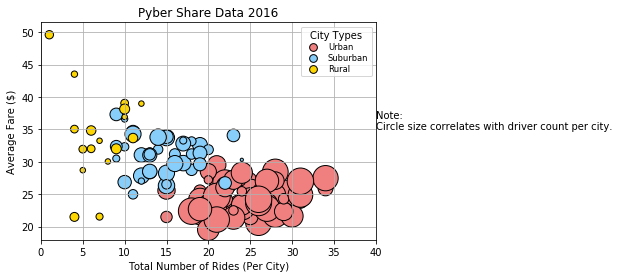

In [5]:
plt.title("Pyber Share Data 2016")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="lightcoral", edgecolor="black", linewidths=1, marker="o", label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="lightskyblue", 
            edgecolor="black", linewidths=1, marker="o", label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o",label="Rural")

# PLOT LEGEND
# - note - Attempting to place legend prior to plt.scatter() does NOT work
#
plotlegend = plt.legend(fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1, loc="best", title="City Types", 
                  labelspacing=0.25)
plotlegend.legendHandles[0]._sizes = [60]
plotlegend.legendHandles[1]._sizes = [60]
plotlegend.legendHandles[2]._sizes = [60]

plt.text(40, 35, "Note:\nCircle size correlates with driver count per city.")
plt.savefig("analysis/Scatter1.png")
plt.show()

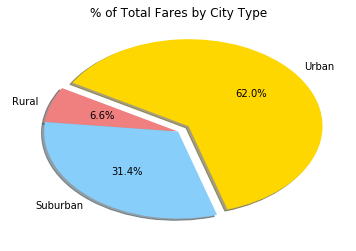

In [6]:
type_percents = 100 * merge_ride_data.groupby(["type"]).sum()["fare"] / merge_ride_data["fare"].sum()
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["lightcoral", "lightskyblue", "gold"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.savefig("analysis/PChart1.png")
plt.show()

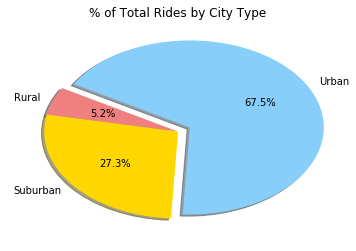

In [7]:
# Calculate Ride Percentages
ride_percents = 100 * merge_ride_data.groupby(["type"]).count()["ride_id"] / merge_ride_data["ride_id"].count()

plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["lightcoral", "gold", "lightskyblue"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

plt.savefig("analysis/PChart2.png")

plt.show()

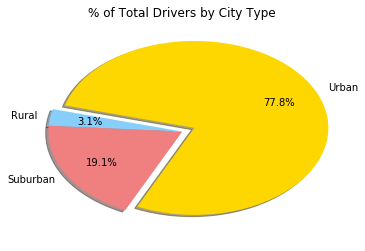

In [8]:
driver_percentage = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

plt.pie(driver_percentage, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["lightskyblue", "lightcoral", "gold"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
plt.savefig("analysis/PChart3.png")

# Show PLOT
plt.show()